In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=200,n_features=2,centers = 7,cluster_std=1.8,
                  random_state=101)

In [ ]:
data


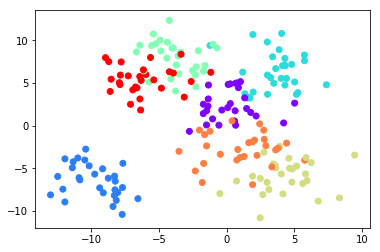

In [6]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=4)

In [9]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_

array([[ 1.84763327,  4.07017322],
       [-9.68218822, -6.50053372],
       [-4.95759759,  6.76893734],
       [ 2.87782487, -4.6851695 ]])

In [11]:
kmeans.labels_

array([2, 2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 1, 2, 0, 3, 3, 0, 3, 1, 2, 1, 1,
       0, 3, 2, 0, 0, 0, 3, 0, 2, 0, 3, 0, 2, 3, 2, 0, 1, 0, 0, 3, 1, 2,
       3, 0, 3, 3, 1, 0, 2, 0, 0, 3, 3, 1, 2, 0, 2, 2, 2, 3, 0, 1, 2, 3,
       1, 0, 0, 2, 3, 2, 3, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 3, 3, 0, 3, 0,
       0, 0, 2, 3, 3, 1, 2, 0, 1, 3, 2, 2, 3, 0, 2, 0, 1, 2, 2, 2, 0, 1,
       2, 0, 2, 2, 2, 1, 0, 3, 0, 1, 3, 3, 1, 1, 0, 1, 3, 1, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 2, 3, 3, 3, 1, 0, 2, 0, 3, 2, 3,
       0, 0, 2, 2, 0, 2, 0, 3, 1, 3, 3, 3, 2, 3, 3, 1, 2, 0, 1, 3, 0, 0,
       0, 3, 3, 2, 0, 3, 0, 0, 3, 0, 2, 3, 0, 0, 3, 2, 2, 3, 0, 1, 3, 1,
       0, 0])

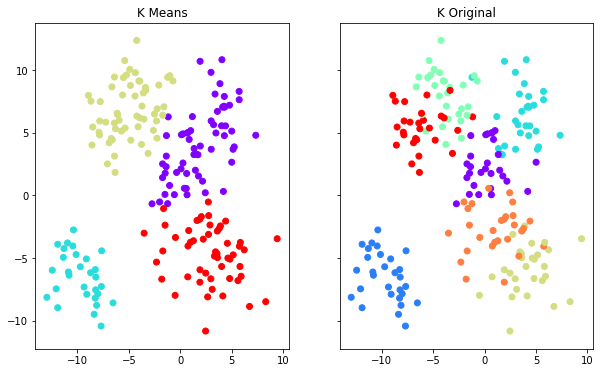

In [12]:
fig , (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title('K Original')
ax2.scatter(data[0][:,0], data[0][:,1],c=data[1],cmap='rainbow')


In [13]:
kmeans.fit_transform()

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()